# Bell test using qiskit


Importing dependencies

In [1]:
from qiskit import *
import matplotlib.pyplot as plt

Creating a Quantum register with 2 qubits and a Classical Register with 2 bits

In [2]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

Create a circuit using the Quantum and the Classical Register


In [3]:
circuit = QuantumCircuit(qreg,creg)

Reset the qubits to the state 0

In [4]:
circuit.reset(qreg[0])
circuit.reset(qreg[1])

Applying a <a href="https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_(H)_gate">Hadamard gate</a> to the first qubit, which will result in a superposition

In [5]:
circuit.h(qreg[0])

Applying a <a href="https://en.wikipedia.org/wiki/Controlled_NOT_gate">CNOT gate</a> to both qubits with the first qubit acting as control.


In [6]:
circuit.cx(qreg[0],qreg[1])

Measuring both qubits and saving them in the classical bits

In [7]:
circuit.measure(qreg[0],creg[0])
circuit.measure(qreg[1],creg[1])

Running the circuit using the QASM simulator backend:

In [8]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=2048)
result = job.result()

Showing the results:

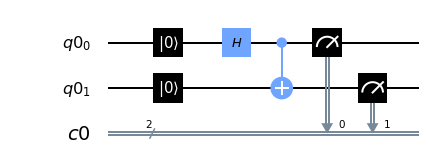

In [9]:
circuit.draw("mpl")

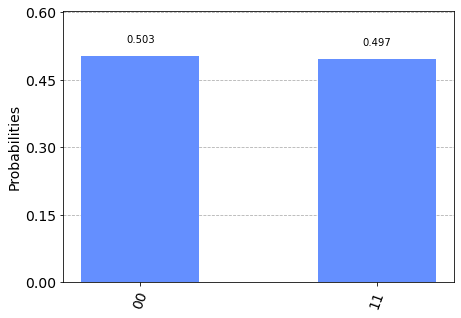

In [10]:
visualization.plot_histogram(result.get_counts())

Running the circuit on a real quantum computer will result in a slightly different results due to measuring errors:

In [11]:
from qiskit.providers.ibmq import least_busy

In [ ]:
provider = IBMQ.load_account() #If this throws an error, run IBMQ.save_account(YOUR_API_KEY). You will find your api key on https://quantum-computing.ibm.com/account

In [18]:
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))

In [22]:
job = execute(circuit, backend=device, shots=2048) #May take some time
results = job.result()
answer = results.get_counts(circuit)

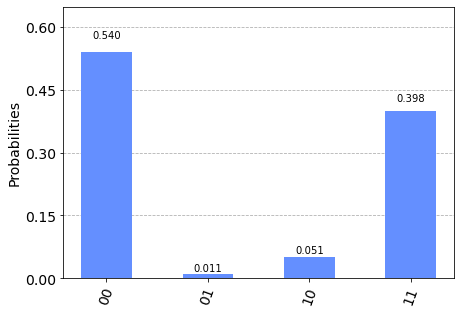

In [24]:
visualization.plot_histogram(answer)